# Bank Customer Churn Analysis

In [1]:
#14 August 2025

**Gather Dataset**

In [42]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
 #load the each of sheets in the excel dataset into dataframes

In [65]:
#customer data
customer_df = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name = 'Customer_Info')

In [66]:
#account data
account_df = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name = 'Account_Info')

**Access Customer Data**

In [67]:
#preview of the customer data

customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [68]:
#customer data info

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [69]:
#shape of data

customer_df.shape

(10001, 8)

From the above analysis, 

1. The data consists of 10001 rows and 8 columns 
2. Missing data in surname and Age columns
3. Incorrect datatype for Age and Estimated Salary columns
4. Inconsistant data in Geography column (French, France and FRA)

In [70]:
# using mean() to Null/NaN values in Age Column

avg_age = customer_df.Age.mean().round()

In [71]:
customer_df['Age'].fillna(avg_age, inplace = True)

In [72]:
customer_df[customer_df['Age'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary


In [73]:
#Change the Data Type of Age Column to int

customer_df['Age'] = customer_df['Age'].astype(int)

In [74]:
#check for duplicates

customer_df[customer_df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
10000,15628319,Walker,792,French,Female,28,4,€38190.78


In [75]:
#Drop Duplicate Entries

customer_df = customer_df.drop_duplicates()

customer_df[customer_df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary


In [76]:
# update Null/NaN values from Surname column to "Not provided"

customer_df['Surname'] = customer_df['Surname'].fillna('Not Provided')

In [77]:
customer_df[customer_df['Surname'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary


In [80]:
#extract the numbers without currency sign using regular expression pattern and change datatype
   
customer_df['EstimatedSalary'] = customer_df['EstimatedSalary'].str.extract(r'([\d.]+)').astype(float)


In [81]:
#customer data info

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int32  
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 664.1+ KB


In [82]:
#descriptive statistics

customer_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.922100,5.012800,100362.194689
std,7.193619e+04,96.653299,10.487499,2.892174,59584.545007
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,100272.165000
75%,1.575323e+07,718.000000,44.000000,7.000000,149406.545000
max,1.581569e+07,850.000000,92.000000,10.000000,999999.000000


In [86]:
#Change values containing French or FRA to France in the Geography column

customer_df['Geography'] = customer_df['Geography'].replace('FRA', 'France')
customer_df['Geography'] = customer_df['Geography'].replace('French', 'France')

In [87]:
customer_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
# check for null values in customerid column

sum(customer_df.CustomerId.isnull())

0

In [48]:
# check for null values in Age column

sum(customer_df.Age.isnull())

0

In [88]:
#check the number of customer from each geographic location

customer_df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [89]:
# Dataframe after cleaning

customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42,2,101348.88
1,15647311,Hill,608,Spain,Female,41,1,112542.58
2,15619304,Onio,502,France,Female,42,8,113931.57
3,15701354,Boni,699,France,Female,39,1,93826.63
4,15737888,Mitchell,850,Spain,Female,43,2,79084.10


**Data Visualization**

Age Distribution

Chart Type: Histogram / KDE Plot

Purpose: See how customer ages are distributed.

Text(0.5, 1.0, 'Age Distribution')

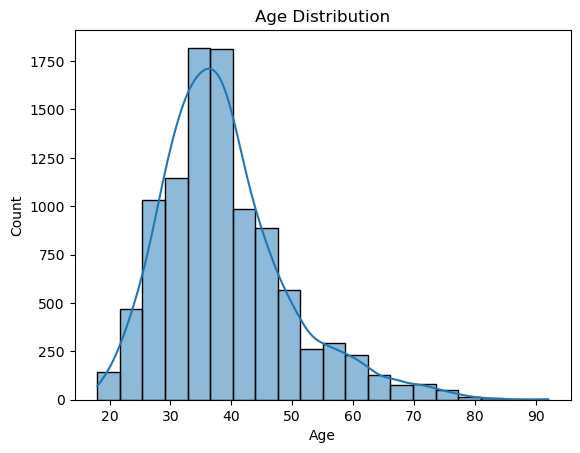

In [111]:
sns.histplot(customer_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

Gender Breakdown

Chart Type: Pie Chart

Purpose: Understand gender ratio.

Text(0.5, 1.0, 'Gender Distribution')

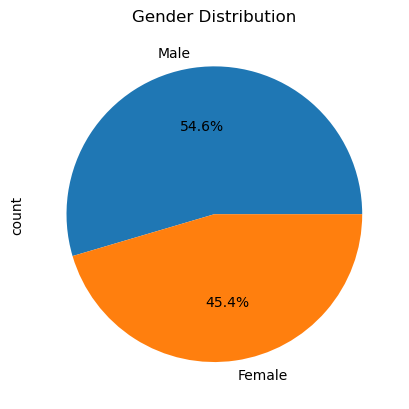

In [112]:
customer_df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')

Geography Distribution

Chart Type: Bar Chart

Purpose: See customer counts by country.

Text(0.5, 1.0, 'Geography Distribution')

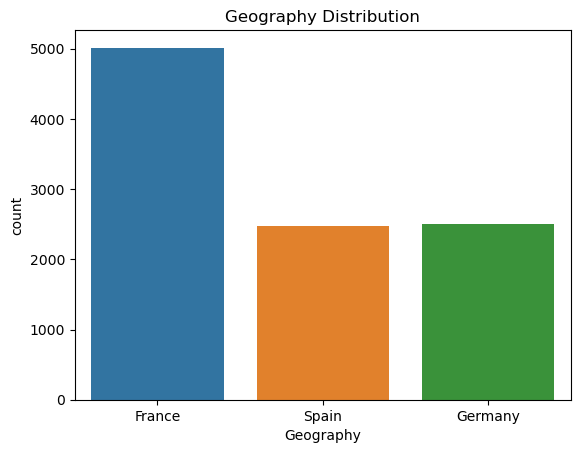

In [113]:
sns.countplot(x='Geography', data=customer_df)
plt.title('Geography Distribution')

Tenure Distribution

Chart Type: Bar Chart

Purpose: See how long customers have been with the company.

Text(0, 0.5, 'No of Customer')

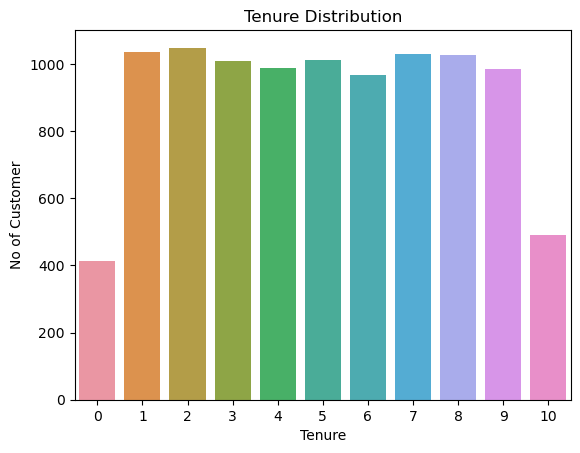

In [114]:
sns.countplot(x='Tenure', data=customer_df)
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('No of Customer')

Age vs Credit Score (Colored by Gender)

Chart Type: Scatter Plot with hue

Text(0.5, 1.0, 'Age vs Credit Score')

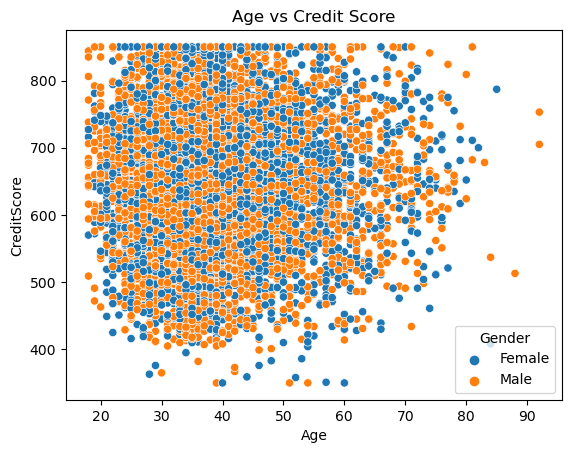

In [115]:
sns.scatterplot(x='Age', y='CreditScore', hue='Gender', data=customer_df)
plt.title('Age vs Credit Score')

Pair Plot

Purpose: Multi-variable relationships

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


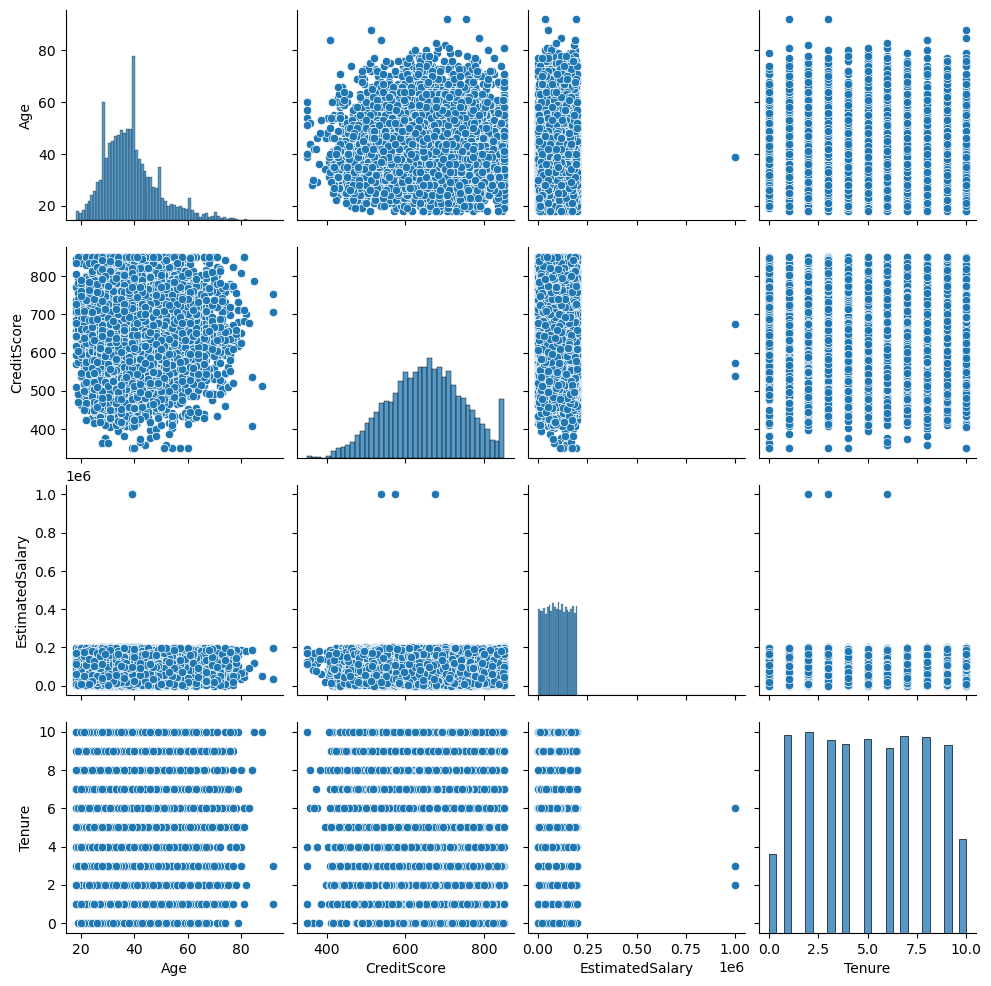

In [116]:
sns.pairplot(customer_df[['Age', 'CreditScore', 'EstimatedSalary', 'Tenure']])

Correlation Heatmap

Purpose: identify relationships between numeric columns

<Axes: >

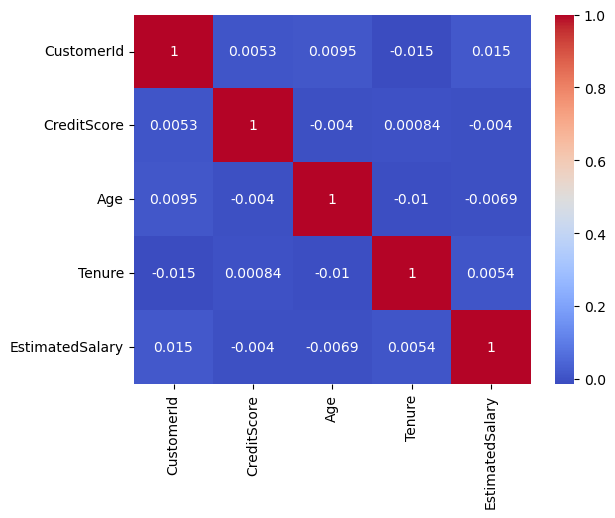

In [117]:
sns.heatmap(customer_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

**Access Account Data**

In [90]:
#preview of the customer data

account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [91]:
#customer data info

account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrCard       10002 non-null  object
 4   Tenure          10002 non-null  int64 
 5   IsActiveMember  10002 non-null  object
 6   Exited          10002 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.1+ KB


In [92]:
#shape of data

account_df.shape

(10002, 7)

From the above analysis, 

1. The data consists of 10002 rows and 7 columns 
2. Incorrect datatype for Balance column

In [93]:
#Check for duplicate entries

account_df[account_df.duplicated()]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
1,15634602,€0.0,1,Yes,2,Yes,1
10001,15628319,€130142.79,1,No,4,No,0


In [94]:
account_df[account_df['CustomerId'] == 15634602]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1


In [95]:
account_df[account_df['CustomerId'] == 15628319]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
10000,15628319,€130142.79,1,No,4,No,0
10001,15628319,€130142.79,1,No,4,No,0


In [96]:
#Delete the duplicate Entries

account_df = account_df.drop_duplicates()

In [97]:
#extract the numbers without currency sign using regular expression pattern and change datatype
   
account_df['Balance'] = account_df['Balance'].str.extract(r'([\d.]+)').astype(float)

In [99]:
# Dataframe after cleaning

account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,0.00,1,Yes,2,Yes,1
2,15647311,83807.86,1,Yes,1,Yes,0
3,15619304,159660.80,3,No,8,No,1
4,15701354,0.00,2,No,1,No,0
5,15737888,125510.82,1,Yes,2,Yes,0


**Merge the Customer & Account Dataframes**

In [100]:
customer_df['CustomerId'].nunique()

10000

In [101]:
account_df['CustomerId'].nunique()

10000

In [102]:
churn_data = customer_df.merge(account_df, on = 'CustomerId', how = 'inner')

In [103]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,No,8,No,1
3,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,Yes,2,Yes,0


In [104]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int32  
 6   Tenure_x         10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  Tenure_y         10000 non-null  int64  
 12  IsActiveMember   10000 non-null  object 
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 1.0+ MB


In [106]:
# Rename the column Tenure_x to Tenure and drop the Tenure_y Column

churn_data= churn_data.rename(columns={'Tenure_x':'Tenure'})

In [108]:
churn_data.drop('Tenure_y', axis = 1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,Yes,0
2,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,No,No,1
3,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,No,No,0
4,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,96270.64,0.00,2,No,No,0
9996,15569892,Johnstone,516,France,Male,35,10,101699.77,57369.61,1,Yes,Yes,0
9997,15584532,Liu,709,France,Female,36,7,42085.58,0.00,1,Yes,Yes,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,No,No,1


**Save the clean data**

In [110]:
churn_data.to_csv('Bank Churn Clean Data.csv', index = False)